# Project name: Quantum AI with Introduction to the bosonic operators
# Contributor: Rajeev Singh Sisodiya
# The BosonOperator:
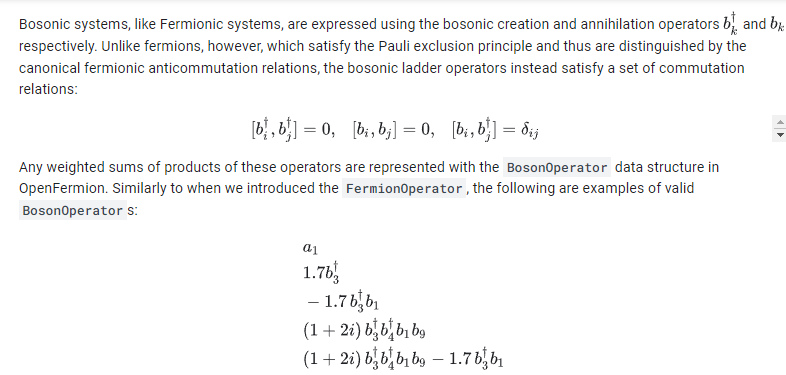

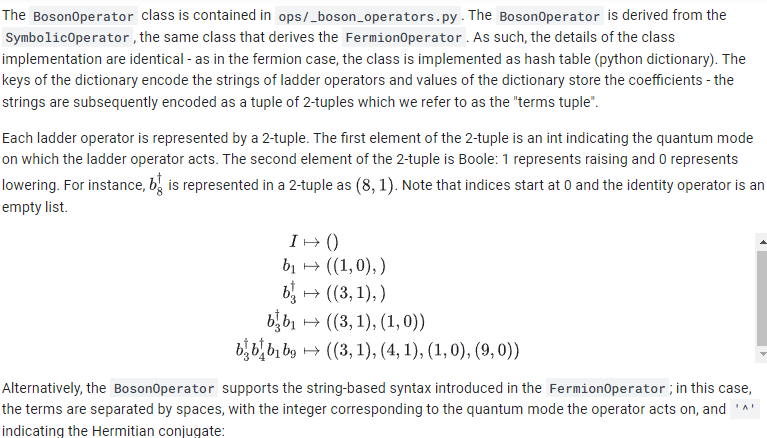

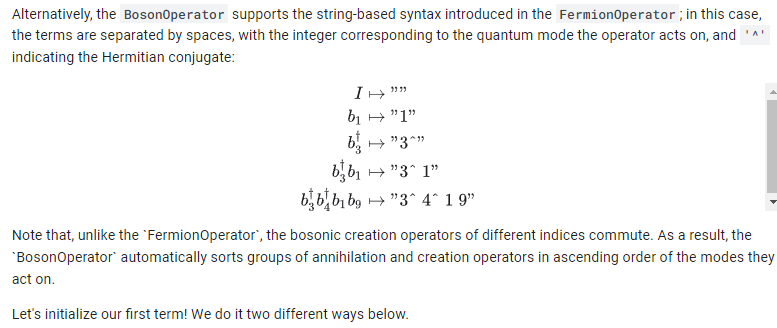


Install the OpenFermion package:

In [ ]:
try:
    import openfermion
except ImportError:
    !pip install git+https://github.com/quantumlib/OpenFermion.git@master#egg=openfermion

In [2]:
from openfermion.ops import BosonOperator

my_term = BosonOperator(((3, 1), (5, 0), (4, 1), (1, 0)))
print(my_term)

my_term = BosonOperator('3^ 5 4^ 1')
print(my_term)

1.0 [1 3^ 4^ 5]
1.0 [1 3^ 4^ 5]


The preferred way to specify the coefficient in openfermion is to provide an optional coefficient argument. If not provided, the coefficient defaults to 1. In the code below, the first method is preferred. The multiplication in the second method actually creates a copy of the term, which introduces some additional cost. All inplace operands (such as +=) modify classes whereas binary operands such as + create copies.

In [3]:
good_way_to_initialize = BosonOperator('3^ 1', -1.7)
print(good_way_to_initialize)

bad_way_to_initialize = -1.7 * BosonOperator('3^ 1')
print(bad_way_to_initialize)

identity = BosonOperator('')
print(identity == BosonOperator.identity())
print(identity)

zero_operator = BosonOperator()
print(zero_operator == BosonOperator.zero())
print(zero_operator)

-1.7 [1 3^]
-1.7 [1 3^]
True
1.0 []
True
0


Note that BosonOperator has only one attribute: .terms. This attribute is the dictionary which stores the term tuples.

In [4]:
my_operator = BosonOperator('4^ 1^ 3 9', 1. + 2.j)
print(my_operator)
print(my_operator.terms)

(1+2j) [1^ 3 4^ 9]
{((1, 1), (3, 0), (4, 1), (9, 0)): (1+2j)}


# Methods and functions that act on the BosonOperator
There are various functions and methods that act on the BosonOperator; these include the ability to normal order, double check if the operator is Hermitian, and calculate the Hermitian conjugate.

In [5]:
from openfermion.utils import hermitian_conjugated, is_hermitian
from openfermion.transforms import normal_ordered

normal_ordered_boson applies the bosonic commutation relations to write the operator using only normal-ordered terms; that is, that all creation operators are to the left of annihilation operators:

In [6]:
H = BosonOperator('0 0^', 1. + 2.j)
H.is_normal_ordered()

False

In [7]:
normal_ordered(BosonOperator('0 0^', 1. + 2.j))

(1+2j) [] +
(1+2j) [0^ 0]

We can also use a boson operator method to check if the operator conserves the particle number - that is, for each qumode, the number of annihilation operators equals the number of creation operators.

In [8]:
H.is_boson_preserving()

True

In [9]:
H = BosonOperator('0 0^ 1^ ', 1. + 2.j)
H.is_boson_preserving()

False

The Hermitian conjugated function returns the Hermitian conjugate of the operator, and its hermiticity can be checked using is_hermitian:

In [10]:
is_hermitian(H)

False

In [11]:
hermitian_conjugated(H)

(1-2j) [0 0^ 1]

In [12]:
H = BosonOperator('0 1^', 1/2.)
H += BosonOperator('1 0^', 1/2.)
print(is_hermitian(H))
print(hermitian_conjugated(H))

True
0.5 [0 1^] +
0.5 [0^ 1]


# The QuadOperator
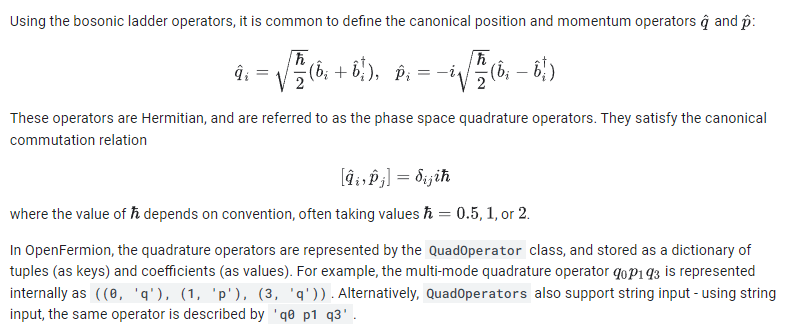


In [13]:
from openfermion.ops import QuadOperator

H = QuadOperator('q0 p1 q3')
print(H)
print(H.terms)

H2 = QuadOperator('q3 p4', 3.17)
H2 -= 77. * H
print('')
print(H2)

1.0 [q0 p1 q3]
{((0, 'q'), (1, 'p'), (3, 'q')): 1.0}

-77.0 [q0 p1 q3] +
3.17 [q3 p4]


Note that quadrature operators of different indices commute; as such, like the BosonOperator, by default we sort quadrature operators such that the operators acting on the lowest numbered mode appear to the left.

Methods and functions that act on the QuadOperator
Like the BosonOperator, there are various functions and methods that act on the QuadOperator; these include the ability to normal order, double check if the operator is Hermitian, and calculate the Hermitian conjugate.

In [14]:
from openfermion.utils import hermitian_conjugated, is_hermitian

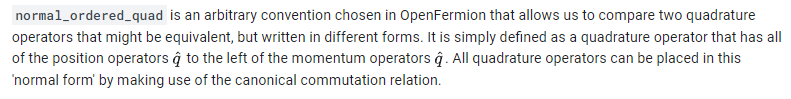

In [15]:
H = QuadOperator('p0 q0', 1. + 2.j)
H.is_normal_ordered()

False

In [16]:
normal_ordered(H)

(2-1j) [] +
(1+2j) [q0 p0]

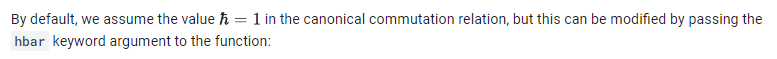

In [17]:
normal_ordered(H, hbar=2)

(4-2j) [] +
(1+2j) [q0 p0]

We can also use a quad operator method to check if the operator is Gaussian - that is, all terms in the quad operator are of quadratic order or lower:

In [18]:
H = QuadOperator('p0 q0', 1. + 2.j)
H.is_gaussian()

True

In [19]:
H = QuadOperator('p0 q0 q1', 1. + 2.j)
H.is_gaussian()

False

The Hermitian conjugated function returns the Hermitian conjugate of the operator, and its hermiticity can be checked using is_hermitian:

In [20]:
H = QuadOperator('p0 q1 p1', 1-2j)
hermitian_conjugated(H)

(1+2j) [p0 p1 q1]

In [21]:
H = QuadOperator('p0 q0', 1/2.)
H += QuadOperator('q0 p0', -1/2.)
print(is_hermitian(H))
print(hermitian_conjugated(H))

False
-0.5 [p0 q0] +
0.5 [q0 p0]


In [22]:
H = QuadOperator('p0 q0', 1/2.)
H += QuadOperator('q0 p0', 1/2.)
print(is_hermitian(H))
print(hermitian_conjugated(H))

True
0.5 [p0 q0] +
0.5 [q0 p0]


In [23]:
hermitian_conjugated(H)

0.5 [p0 q0] +
0.5 [q0 p0]

# Converting between quadrature operators and bosonic operators

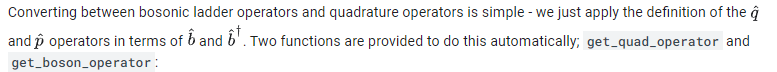

In [24]:
from openfermion.transforms import get_boson_operator, get_quad_operator

In [25]:
H = QuadOperator('p0 q0', 1/2.)
H += QuadOperator('q0 p0', 1/2.)
H

0.5 [p0 q0] +
0.5 [q0 p0]

In [26]:
get_boson_operator(H)

-0.5000000000000001j [0 0] +
0.5000000000000001j [0^ 0^]

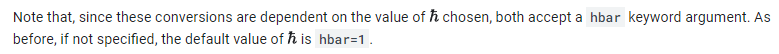

In [27]:
H = BosonOperator('0 0^')
normal_ordered(get_quad_operator(H, hbar=0.5), hbar=0.5)

(0.5+0j) [] +
(1+0j) [p0 p0] +
1.0 [q0 q0]

# Weyl quantization and symmetric ordering
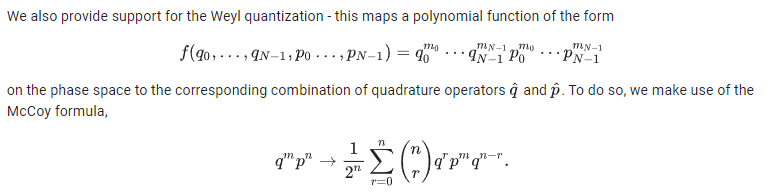

In [28]:
from openfermion.transforms import weyl_polynomial_quantization, symmetric_ordering

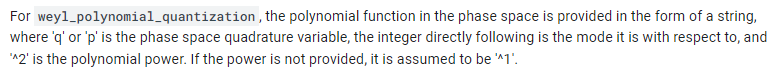

In [29]:
weyl_polynomial_quantization('q0 p0')

0.5 [p0 q0] +
0.5 [q0 p0]

In [30]:
weyl_polynomial_quantization('q0^2 p0^3 q1^3')

0.125 [p0 p0 p0 q0 q0 q1 q1 q1] +
0.375 [p0 p0 q0 q0 p0 q1 q1 q1] +
0.375 [p0 q0 q0 p0 p0 q1 q1 q1] +
0.125 [q0 q0 p0 p0 p0 q1 q1 q1]

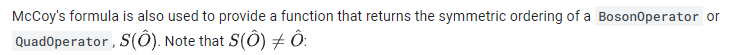

In [31]:
symmetric_ordering(QuadOperator('q0 p0'))

0.5 [p0 q0] +
0.5 [q0 p0]

image.png

In [32]:
from openfermion.hamiltonians import number_operator
n2 = number_operator(1, parity=1) * number_operator(1, parity=1)

In [33]:
n2

1.0 [0^ 0 0^ 0]

In [34]:
Sn2 = symmetric_ordering(n2)
Sn2

0.25 [0 0 0^ 0^] +
0.5 [0 0^ 0^ 0] +
0.25 [0^ 0^ 0 0]

We can use normal_ordered_boson to simplify this result:

In [35]:
Sn2 = normal_ordered(Sn2)
Sn2

0.5 [] +
2.0 [0^ 0] +
1.0 [0^ 0^ 0 0]

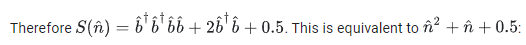

In [36]:
Sn2 == normal_ordered(n2 + number_operator(1, parity=1) + 0.5*BosonOperator.identity())

True

# Bose-Hubbard Hamiltonian
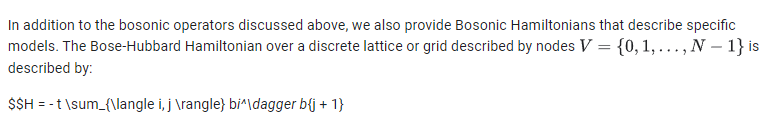

     + \frac{U}{2} \sum_{k=1}^{N-1} b_k^\dagger b_k (b_k^\dagger b_k - 1)
     - \mu \sum_{k=1}^N b_k^\dagger b_k
     + V \sum_{\langle i, j \rangle} b_i^\dagger b_i b_j^\dagger b_j.$$

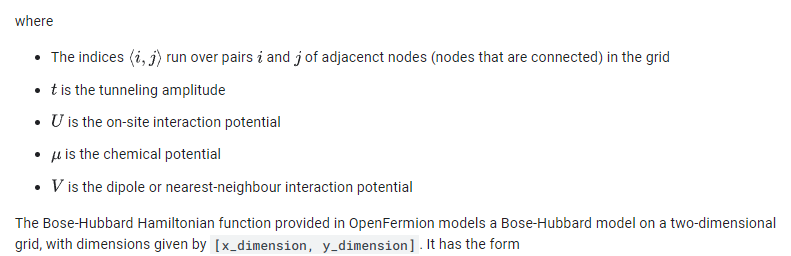

bose_hubbard(x_dimension, y_dimension, tunneling, interaction,
                 chemical_potential=0., dipole=0., periodic=True)

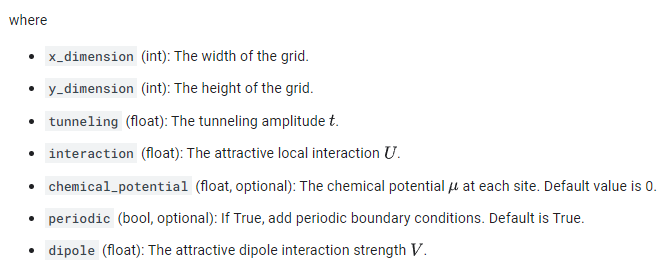

Below is an example of a Bose-Hubbard Hamiltonian constructed in OpenFermion.

In [38]:
from openfermion.hamiltonians import bose_hubbard, fermi_hubbard
bose_hubbard(2, 2, 1, 1)

-1.0 [0 1^] +
-1.0 [0 2^] +
-0.5 [0^ 0] +
0.5 [0^ 0 0^ 0] +
-1.0 [0^ 1] +
-1.0 [0^ 2] +
-1.0 [1 3^] +
-0.5 [1^ 1] +
0.5 [1^ 1 1^ 1] +
-1.0 [1^ 3] +
-1.0 [2 3^] +
-0.5 [2^ 2] +
0.5 [2^ 2 2^ 2] +
-1.0 [2^ 3] +
-0.5 [3^ 3] +
0.5 [3^ 3 3^ 3]

# Sparse bosonic operators
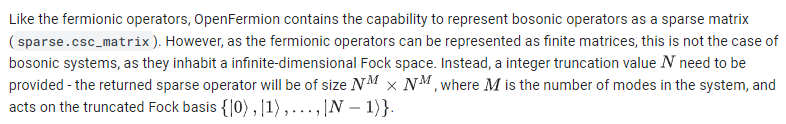

In [39]:
from openfermion.linalg import boson_operator_sparse

The function boson_operator_sparse acts on both BosonOperators and QuadOperators:

In [40]:
H = boson_operator_sparse(BosonOperator('0^ 0'), 5)

In [41]:
H.toarray()

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 3.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 4.+0.j]])

In [42]:
H = boson_operator_sparse(QuadOperator('q0'), 5, hbar=1)
H.toarray()

array([[0.        +0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j],
       [0.70710678+0.j, 0.        +0.j, 1.        +0.j, 0.        +0.j,
        0.        +0.j],
       [0.        +0.j, 1.        +0.j, 0.        +0.j, 1.22474487+0.j,
        0.        +0.j],
       [0.        +0.j, 0.        +0.j, 1.22474487+0.j, 0.        +0.j,
        1.41421356+0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 1.41421356+0.j,
        0.        +0.j]])